<a href="https://colab.research.google.com/github/heinohen/tko_7095_i2hlt/blob/main/week6_ex2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TASK 12: Analogy evaluation

Read in the analogy tuples from the file

In [10]:
!wget https://raw.githubusercontent.com/nicholas-leonard/word2vec/master/questions-words.txt

--2024-04-17 10:48:50--  https://raw.githubusercontent.com/nicholas-leonard/word2vec/master/questions-words.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 603955 (590K) [text/plain]
Saving to: ‘questions-words.txt’

questions-words.txt 100%[===================>] 589.80K  --.-KB/s    in 0.04s   

2024-04-17 10:48:50 (13.1 MB/s) - ‘questions-words.txt’ saved [603955/603955]



In [42]:
!wget http://dl.turkunlp.org/TKO_7095_2023/12.zip

--2024-04-17 11:38:52--  http://dl.turkunlp.org/TKO_7095_2023/12.zip
Resolving dl.turkunlp.org (dl.turkunlp.org)... 195.148.30.23
Connecting to dl.turkunlp.org (dl.turkunlp.org)|195.148.30.23|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 613577258 (585M) [application/zip]
Saving to: ‘12.zip’

12.zip              100%[===================>] 585.15M  20.0MB/s    in 31s     

2024-04-17 11:39:23 (18.9 MB/s) - ‘12.zip’ saved [613577258/613577258]



In [46]:
!unzip -o 12.zip

Archive:  12.zip
  inflating: meta.json               
  inflating: model.bin               
  inflating: model.txt               
  inflating: README                  


In [47]:
import gensim
from gensim.models import KeyedVectors

wv_emb_en = KeyedVectors.load_word2vec_format('model.bin', limit = 100000, binary = True) # same principle as ex. before

In [ ]:
#012
#: capital-common-countries
#Athens Greece Baghdad Iraq
#Athens Greece Bangkok Thailand
#Athens Greece Beijing China
#...

#012
#: capital-world
#Abuja Nigeria Accra Ghana
#Abuja Nigeria Algiers Algeria
#Abuja Nigeria Amman Jordan
#...

#012
#: currency
#Algeria dinar Angola kwanza
#Algeria dinar Argentina peso
#Algeria dinar Armenia dram


In [39]:
## WORKFLOW ##
# 1) create dict to store all 14
# 2) line by line for file
# 3) looking at above see that index 2 start of actual taskname
# 4) format it and create dict entry
# 5) create a list of tuples 'taskitems' to store in dict under key == 'taskname'
# 6) return it
## END ##

# 1)
task_dict = dict() # key == task, value == list of tuples

fname = 'questions-words.txt'
counter = 0

with open(fname) as f:
  # 2)
  for r in f:
    if not r:
      continue # skip empty
    # 3)
    if r.startswith(":"):
      counter += 1
      print(counter) # if we are at start of a task, create entry for dict
      task_name = r[2:].strip('\n')
      print(task_name)
      taskitems = []
      task_dict[task_name] = taskitems

    else:
      #012
      #: capital-common-countries
      #1    " " 2  " "  3  " "  4
      #Athens Greece Baghdad Iraq
      #Athens Greece Bangkok Thailand
      #Athens Greece Beijing China
      #print(r.strip('\n').split(" "))
      taskitems.append(tuple([word for word in r.strip('\n').split(" ")]))





1
capital-common-countries
2
capital-world
3
currency
4
city-in-state
5
family
6
gram1-adjective-to-adverb
7
gram2-opposite
8
gram3-comparative
9
gram4-superlative
10
gram5-present-participle
11
gram6-nationality-adjective
12
gram7-past-tense
13
gram8-plural
14
gram9-plural-verbs


In [37]:

## CHECK ##

print(task_dict['capital-common-countries'][0]) # Athens Greece Baghdad Iraq
print(task_dict['capital-world'][0]) # Abuja Nigeria Accra Ghana
print(task_dict['currency'][0]) # Algeria dinar Angola kwanza

if counter == 14: # It consists of 9+5=14 sets of word analogies.
  print(f'tasks: {counter}')
else:
  print(f'some tasks missing, count is {counter}')
## END ##


('Athens', 'Greece', 'Baghdad', 'Iraq')
('Abuja', 'Nigeria', 'Accra', 'Ghana')
('Algeria', 'dinar', 'Angola', 'kwanza')
tasks: 14


Write a function eval_analogy(tuples,embeddings,K) which will return the top-K accuracy of the embeddings (Gensim's KeyedVectors) on tuples, which are the analogy 4-tuples. For instance for the tuple ("Athens","Greece","Havana","Cuba") will be counted as correct if the analogy on the first three words results in K nearest neighbors that contain also "Cuba". Hope this is clear. :)
Run this function on the 14 tasks you read in step (1) and see if you see any interesting differences

In [96]:
triples=[("cow","milk","hen"),
         ("Paris","France","Helsinki"),
         ("car","wheel","airplane"),
         ("airplane","propeller","ship"),
         ("king","queen","man"),
         ("man","doctor","woman"),
         ("man","boss","woman")
         ]
for what,is_to_what,as_this_is in triples:
    # is_to_what-what+as_this_is
    to_what=wv_emb_en.most_similar(positive=[is_to_what,as_this_is],negative=[what])[0][0]
    print(f"{what} is to {is_to_what} as {as_this_is} is to: {to_what}")


cow is to milk as hen is to: sauce
Paris is to France as Helsinki is to: Finland
car is to wheel as airplane is to: rudder
airplane is to propeller as ship is to: vessel
king is to queen as man is to: woman
man is to doctor as woman is to: physician
man is to boss as woman is to: bosses


In [131]:
# Build func for this so it can be run in sequence

"""
Returns percentage of accuracy as a float
tuples == 2 pairs, 4 words

"""
def eval_analogy(t: tuple, embeddings: KeyedVectors, K: int) -> list:
  """
  B     A      C
  Paris-France+Sweden= ___?
  i.e. France is to Paris as Sweden is to X
  wv_emb_en.most_similar(positive=["Paris","Sweden"],negative=["France"])

  """
  corr = 0 # analogy correct
  all = 0 # all tuples
  loss = 0 # skipped tuples i.e KeyError: "Key 'kwanza' not present in vocabulary"?????????????????

  for word1,word2,word3,word4 in t:
    try:
      nearest = embeddings.most_similar(positive = [word2, word3], negative = [word1], topn = K)
      words = set([word for word,scores in nearest])
      print(f'original tuple: {word1,word2,word3,word4}')
      print(f'unique nearest neighbours: {words}')
      if word4 in words:
        print(f'match {word4} {words}')
        corr += 1
      all += 1
    except:
      loss += 1
      continue

  # if i fu'd
  if all == 0:
    return []
  return [100 * float(corr)/float(all),100 * float(loss)/float(all), all]

In [132]:
print(eval_analogy(task_dict['capital-common-countries'], wv_emb_en, 3))

original tuple: ('Athens', 'Greece', 'Baghdad', 'Iraq')
unique nearest neighbours: {'Iraqi', 'Iraq', 'BAGHDAD'}
match Iraq {'Iraqi', 'Iraq', 'BAGHDAD'}
original tuple: ('Athens', 'Greece', 'Bangkok', 'Thailand')
unique nearest neighbours: {'Thai', 'BANGKOK', 'Thailand'}
match Thailand {'Thai', 'BANGKOK', 'Thailand'}
original tuple: ('Athens', 'Greece', 'Beijing', 'China')
unique nearest neighbours: {'mainland', 'Chinese', 'China'}
match China {'mainland', 'Chinese', 'China'}
original tuple: ('Athens', 'Greece', 'Berlin', 'Germany')
unique nearest neighbours: {'German', 'Germany', 'BERLIN'}
match Germany {'German', 'Germany', 'BERLIN'}
original tuple: ('Athens', 'Greece', 'Bern', 'Switzerland')
unique nearest neighbours: {'Switzerland', 'Germany', 'Luxembourg'}
match Switzerland {'Switzerland', 'Germany', 'Luxembourg'}
original tuple: ('Athens', 'Greece', 'Cairo', 'Egypt')
unique nearest neighbours: {'Egypt', 'Egyptian', 'Hosni'}
match Egypt {'Egypt', 'Egyptian', 'Hosni'}
original tuple

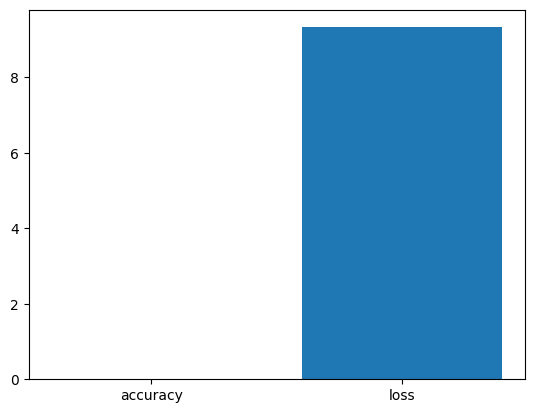

In [84]:
#import matplotlib.pyplot as plt
#import numpy as np

#setup
#width = 0.5

#fig, ax = plt.subplots()

#bar = ax.bar(["accuracy", "loss"], results[key])